<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

**Random Adjacency Matrix**

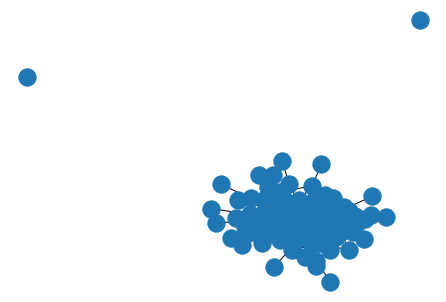

In [2]:
G = nx.gnm_random_graph(100, 200)
nx.draw(G)
plt.show()

In [3]:
adj = nx.adjacency_matrix(G).toarray()
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
np.where(adj==1)

(array([ 0,  0,  0,  1,  1,  2,  2,  3,  3,  3,  4,  5,  5,  5,  5,  6,  6,
         6,  6,  7,  7,  8,  8,  8,  9, 10, 11, 11, 11, 11, 13, 13, 13, 13,
        13, 13, 14, 14, 14, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19,
        20, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24,
        24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27,
        27, 27, 28, 28, 28, 28, 28, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
        32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35,
        35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 38, 38, 38, 38,
        38, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41,
        41, 41, 41, 41, 42, 42, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45,
        46, 47, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50,
        50, 50, 50, 51, 51, 51, 51, 51, 52, 53, 53, 53, 53, 54, 54, 54, 54,
        54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 58, 58, 59,
        59, 

**Adjacency List**

In [5]:
class Node: 
  
  def __init__(self): 
    self.graph = defaultdict(list) 


  def add_edge(self, u, v): 
    self.graph[u].append(v) 


  def DFS_Marking(self, v, dfs_marked, dfs_result): 
    dfs_marked[v] = True
    dfs_result.append(v) 
    for i in self.graph[v]: 
      if dfs_marked[i] == False: 
        self.DFS_Marking(i, dfs_marked, dfs_result)
    return dfs_result 


  def DFS(self, v):
    dfs_result = [] 
    dfs_marked = [False] * (max(self.graph)+1) 
    return self.DFS_Marking(v, dfs_marked, dfs_result)


  def BFS(self, s):
    bfs_result = [] 
    bfs_marked = [False] * (len(self.graph)) 
    queue = [] 
    queue.append(s) 
    bfs_marked[s] = True
    while queue: 
      s = queue.pop(0) 
      bfs_result.append(s)
      for i in self.graph[s]: 
        if bfs_marked[i] == False: 
          queue.append(i) 
          bfs_marked[i] = True 
    return bfs_result

  
  def print_list(self): 
    for i in range(len(self.graph)): 
      print("Adjacency list of node {}:\n".format(i), end="") 
      curr_node = self.graph[i] 
      for i in curr_node: 
        print(" {}".format(i), end=" ")
      print(" \n")


  def calc_distance(self, s, d, s_method):
    path = self.BFS(s) if s_method == "BFS" else self.DFS(s)
    try:
      distance = path.index(d)
      ret_path = path[:distance+1]
    except ValueError:
      ret_path = "No Path Found!"
      distance = "N/A"
    return distance, ret_path

In [6]:
g = Node()
for i in range(100):
  for j in range(100):
    if adj[i][j] == 1:
      g.add_edge(i, j)

In [7]:
g.print_list()

Adjacency list of node 0:
 26  29  73  

Adjacency list of node 1:
 66  91  

Adjacency list of node 2:
 33  39  

Adjacency list of node 3:
 28  58  75  

Adjacency list of node 4:
 28  

Adjacency list of node 5:
 36  51  56  59  

Adjacency list of node 6:
 47  55  87  98  

Adjacency list of node 7:
 16  69  

Adjacency list of node 8:
 17  72  74  

Adjacency list of node 9:
 24  

Adjacency list of node 10:
 39  

Adjacency list of node 11:
 36  44  69  91  

Adjacency list of node 12:
 

Adjacency list of node 13:
 23  24  36  43  66  89  

Adjacency list of node 14:
 26  35  95  

Adjacency list of node 15:
 

Adjacency list of node 16:
 7  17  67  78  

Adjacency list of node 17:
 8  16  61  77  

Adjacency list of node 18:
 51  54  84  

Adjacency list of node 19:
 64  

Adjacency list of node 20:
 61  

Adjacency list of node 21:
 23  90  

Adjacency list of node 22:
 28  38  66  70  73  98  

Adjacency list of node 23:
 13  21  40  47  48  96  

Adjacency list of node 24:
 

**Breadth First Search**

In [8]:
print(str(g.BFS(68)))

[68, 31, 41, 62, 83, 87, 25, 73, 74, 56, 60, 54, 98, 6, 27, 57, 42, 50, 75, 93, 0, 22, 34, 55, 66, 84, 8, 24, 40, 78, 5, 81, 82, 35, 71, 80, 91, 18, 38, 77, 79, 86, 99, 32, 44, 51, 47, 28, 48, 33, 92, 3, 26, 69, 39, 64, 72, 90, 29, 70, 65, 94, 1, 13, 17, 9, 49, 53, 23, 16, 61, 36, 59, 37, 67, 14, 63, 76, 95, 11, 45, 58, 97, 85, 43, 4, 2, 30, 96, 7, 10, 19, 21, 89, 46, 20, 52, 88]


In [9]:
distance, path = g.calc_distance(4, 99, "BFS")
print("Distance = "+str(distance))
print("Path = "+str(path))

Distance = 47
Path = [4, 28, 3, 22, 27, 71, 58, 75, 38, 66, 70, 73, 98, 35, 48, 87, 60, 95, 86, 25, 26, 32, 33, 69, 45, 49, 54, 67, 1, 13, 94, 72, 89, 0, 31, 34, 55, 84, 6, 24, 44, 51, 62, 14, 36, 63, 76, 99]


**Depth First Search**

In [10]:
print(str(g.DFS(9)))

[9, 24, 13, 23, 21, 90, 53, 40, 50, 25, 31, 41, 56, 5, 36, 11, 44, 85, 59, 49, 38, 22, 28, 3, 58, 86, 54, 18, 51, 81, 37, 91, 1, 66, 73, 0, 26, 14, 35, 27, 48, 45, 72, 8, 17, 16, 7, 69, 75, 32, 93, 39, 2, 33, 30, 52, 61, 20, 78, 74, 55, 6, 47, 43, 92, 87, 57, 34, 65, 82, 67, 63, 96, 88, 84, 68, 62, 98, 83, 94, 46, 42, 70, 89, 97, 64, 19, 95, 71, 60, 80, 10, 99, 77, 76, 29, 79, 4]


In [11]:
distance, path = g.calc_distance(4, 99, "DFS")
print("Distance = "+str(distance))
print("Path = "+str(path))

Distance = 86
Path = [4, 28, 3, 58, 86, 40, 23, 13, 24, 9, 49, 38, 22, 66, 1, 91, 11, 36, 5, 51, 18, 54, 62, 68, 31, 25, 41, 56, 81, 37, 59, 53, 90, 21, 61, 17, 8, 72, 45, 48, 27, 35, 14, 26, 0, 29, 73, 34, 57, 87, 6, 47, 39, 2, 33, 30, 52, 94, 46, 55, 74, 78, 16, 7, 69, 75, 32, 93, 64, 19, 97, 89, 70, 95, 71, 60, 80, 98, 44, 85, 63, 67, 82, 65, 96, 88, 99]
